In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#importing the contents from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
forest_fire_data_path = '/content/drive/My Drive/fire_dataset'
os.chdir(forest_fire_data_path)

#List the folders in the directory
os.listdir()

['non_fire_images', 'fire_images']

Defining the directory of my dataset


In [ ]:
dataset_dir = '/content/drive/My Drive/fire_dataset/'


Extracting the file names and labels in the dataset


In [ ]:
def extract_filenames_and_labels(dataset_dir):
    filenames = []
    labels = []

    for label in os.listdir(dataset_dir):
        label_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file)
                if os.path.isfile(file_path):
                    filenames.append(file_path)
                    labels.append(label)

    return filenames, labels

filenames, labels = extract_filenames_and_labels(dataset_dir)

# Create a DataFrame
df = pd.DataFrame({
    'filename': filenames,
    'label': labels
})

print(df.head())

                                            filename            label
0  /content/drive/My Drive/fire_dataset/non_fire_...  non_fire_images
1  /content/drive/My Drive/fire_dataset/non_fire_...  non_fire_images
2  /content/drive/My Drive/fire_dataset/non_fire_...  non_fire_images
3  /content/drive/My Drive/fire_dataset/non_fire_...  non_fire_images
4  /content/drive/My Drive/fire_dataset/non_fire_...  non_fire_images


Finding the missing values present in the **dataset**

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Identify rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing_values)


Missing values in each column:
filename    0
label       0
dtype: int64
Rows with missing values:
Empty DataFrame
Columns: [filename, label]
Index: []


Identifing the labels in my dataset

In [ ]:
unique_labels = df['label'].unique()
print("Unique labels in the dataset:")
print(unique_labels)

Unique labels in the dataset:
['non_fire_images' 'fire_images']


In [ ]:
# Updating  the label dictionary for new labels
label_dict = {'fire_images': 1, 'non_fire_images': 0}

# Converting labels to binary format
binary_labels = [label_dict.get(label, -1) for label in labels]

# Checking for any labels not found in the dictionary
if -1 in binary_labels:
    print("These labels are not found in the dictionary.")

image_paths = df['filename'].tolist()

**Loading and preprocessing the images**

In [ ]:
def load_and_preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []

    for img_path in image_paths:
        # Load the image
        img = image.load_img(img_path, target_size=img_size)


        img_array = image.img_to_array(img)                          # image to a NumPy array


        img_array = np.expand_dims(img_array, axis=0)                # Add dimension

        # Preprocess the image
        img_array = preprocess_input(img_array)

        # Append the preprocessed image to the list
        images.append(img_array)

    # Convert the list of images to a NumPy array
    images = np.vstack(images)

    # Convert labels to a NumPy array
    labels = np.array(labels)

    return images, labels

In [ ]:
# Converting labels using the updated dictionary
image_paths = df['filename'].tolist()
images, labels = load_and_preprocess_images(image_paths, binary_labels)

In [ ]:
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


Images shape: (999, 224, 224, 3)
Labels shape: (999,)


**Spliting the dataset into train and test sets**

In [ ]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")

Training set shape: (799, 224, 224, 3), (799,)
Validation set shape: (200, 224, 224, 3), (200,)


Using cnn model for traing the dataset

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])


In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
25/25 [==============================] - 12s 153ms/step - loss: 32.6863 - accuracy: 0.8561 - val_loss: 0.5116 - val_accuracy: 0.9200
Epoch 2/10
25/25 [==============================] - 2s 73ms/step - loss: 0.2375 - accuracy: 0.9474 - val_loss: 0.1333 - val_accuracy: 0.9350
Epoch 3/10
25/25 [==============================] - 2s 71ms/step - loss: 0.1310 - accuracy: 0.9587 - val_loss: 0.0753 - val_accuracy: 0.9800
Epoch 4/10
25/25 [==============================] - 2s 71ms/step - loss: 0.0991 - accuracy: 0.9675 - val_loss: 0.1035 - val_accuracy: 0.9600
Epoch 5/10
25/25 [==============================] - 2s 65ms/step - loss: 0.0840 - accuracy: 0.9787 - val_loss: 0.1490 - val_accuracy: 0.9300
Epoch 6/10
25/25 [==============================] - 2s 65ms/step - loss: 0.0571 - accuracy: 0.9837 - val_loss: 0.0897 - val_accuracy: 0.9500
Epoch 7/10
25/25 [==============================] - 2s 67ms/step - loss: 0.0570 - accuracy: 0.9850 - val_loss: 0.0699 - val_accuracy: 0.9550
Epoch 8/10

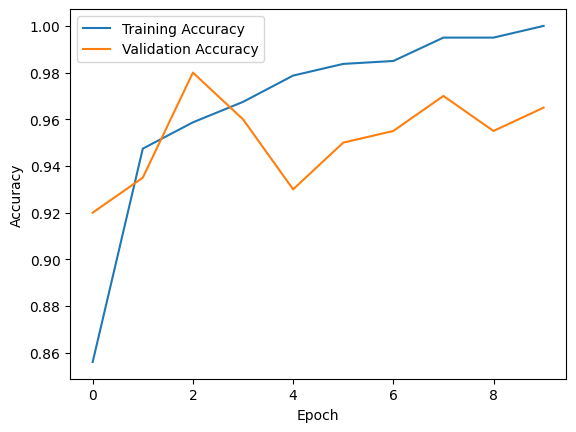

In [ ]:
# Ploting training history
import matplotlib.pyplot as plt

# Traini and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

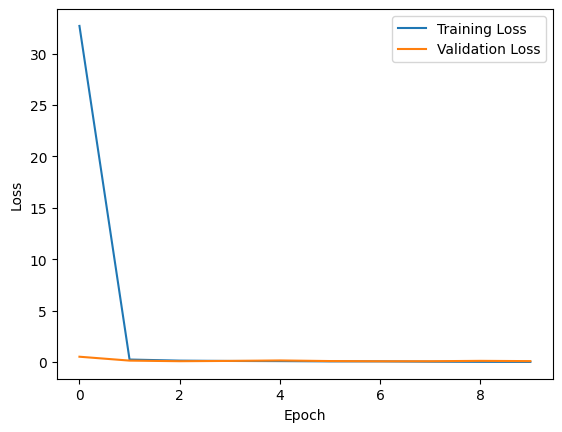

In [ ]:
# Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluating the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

7/7 - 0s - loss: 0.0838 - accuracy: 0.9650 - 182ms/epoch - 26ms/step
Validation Loss: 0.08382462710142136
Validation Accuracy: 0.9649999737739563


In [ ]:
# predictions on the validation set
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

7/7 [==============================] - 0s 21ms/step


In [ ]:
#  classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=['non_fire_images', 'fire_images']))

Classification Report:
                 precision    recall  f1-score   support

non_fire_images       0.87      0.98      0.92        42
    fire_images       0.99      0.96      0.98       158

       accuracy                           0.96       200
      macro avg       0.93      0.97      0.95       200
   weighted avg       0.97      0.96      0.97       200



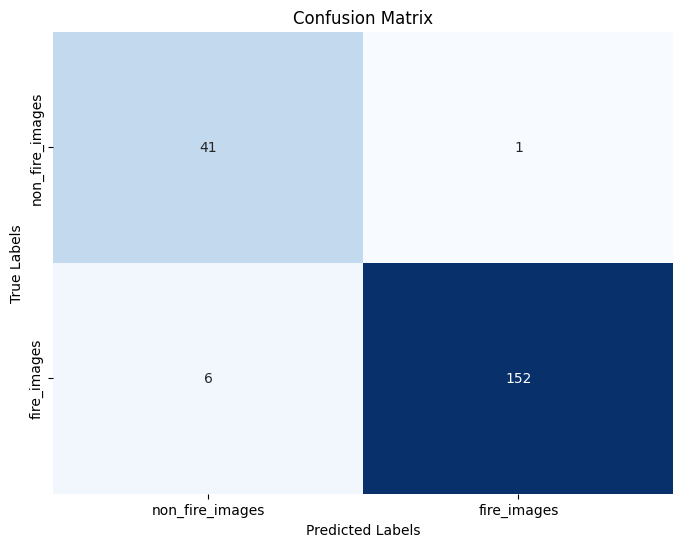

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['non_fire_images', 'fire_images'], columns=['non_fire_images', 'fire_images'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['non_fire_images', 'fire_images'],
            yticklabels=['non_fire_images', 'fire_images'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
 #Load the ResNet50 model pre-trained on ImageNet
 from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 12s 0us/step


In [ ]:
# Add custom layers on top of the base model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

In [ ]:
# Define the complete model
from tensorflow.keras.models import Model
model = Model(inputs=base_model.input, outputs=x)


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Unfreeze some layers and continue training (optional)
# for layer in base_model.layers[-10:]:
#     layer.trainable = True

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# history_fine_tune = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Generate predictions on the validation set
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

7/7 [==============================] - 6s 266ms/step


In [ ]:
# Generate the classification report
try:
    report = classification_report(y_val, y_pred, target_names=['non_fire_images', 'fire_images'], output_dict=True)
    # Extract precision from the classification report
    precision_table = pd.DataFrame({
        'Class': [key for key in report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']],
        'Precision': [report[key]['precision'] for key in report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]
    })

    print("Precision Table:")
    print(precision_table)
except Exception as e:
    print(f"An error occurred while generating the classification report: {e}")

Precision Table:
             Class  Precision
0  non_fire_images   0.000000
1      fire_images   0.787879


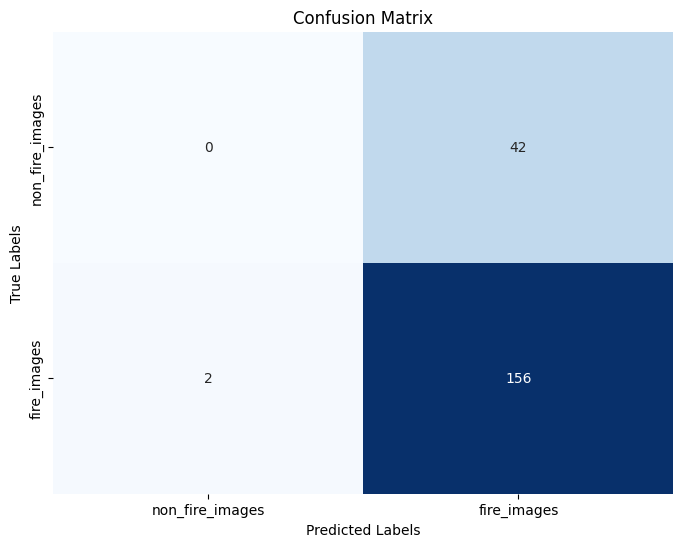

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['non_fire_images', 'fire_images'], columns=['non_fire_images', 'fire_images'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['non_fire_images', 'fire_images'],
            yticklabels=['non_fire_images', 'fire_images'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()